<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

In [8]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pylab, gridspec, pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from math import sqrt

Задание 1
## Простейший kNN
Вам выданы координаты точек и метки классов. Нужно для новой точки предсказать метку класса.

In [44]:
# выгрузите данные в массивы reds и blues из файлов reds.txt и blues.txt
file1 = open('reds.txt',mode='r')
file2 = open('blues.txt',mode='r')
reds = np.array([float(line.strip().split(',')[1]) for line in file1])
blues = np.array([float(line.strip().split(',')[1]) for line in file2])
file1.close()
file2.close()

a = [x for x in range(800)]
red_pairs=[[i,reds[i]] for i in range(800)]
blue_pairs=[[i,blues[i]] for i in range(800)]
len(blue_pairs)

800

Постройте на одном графике точки `reds`и `blues` при помощи `plt.scatter`

In [62]:
plt.figure(figsize=(100,300))
plt.scatter(a,reds, c='r')
plt.scatter(a,blues, c='b')
plt.title('r&b')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


 Напишем функцию, которая выбирает для заданного **k** и координат точки наиболее подходящий класс по методу k ближайших соседей

In [63]:
def guess_class(x,y,k):
    
    dot = np.array((x,y))
    def draw_points(x,y):
        plt.figure(figsize=(5,5))
        plt.grid(ls='--')
        plt.scatter(a,reds, c='r')
        plt.scatter(a,blues, c='b')
        plt.scatter(x,y)
        plt.xlim(x-4, x+4)
        plt.ylim(y-4, y+4)
    draw_points(x,y)
    
    def distance_2d(b,c):
        distance_euclid = sqrt((c[0]-b[0])**2+(c[1]-b[1])**2)
        return distance_euclid
        
    def calculate_k_distances(class_points):
        distances = np.zeros(len(class_points))
        ind=0
        for class_dot in class_points:
            distances[ind]=distance_2d(class_dot,dot)
            ind+=1
        distances = np.sort(distances)[:k]
        return distances
             
    b = np.array(calculate_k_distances(blue_pairs)) # расстояния до ближайших k соседей класса blue
    r = np.array(calculate_k_distances(red_pairs)) # расстояния до ближайших k соседей класса red
    
     # вам необходимо проверить расстояния до ближайших k точек и посмотреть, какой класс встречается чаще всего. 
    br = np.sort(np.concatenate((b,r)))
    br = br[:k]
    counter_b=0
    counter_r=0
    for d in br:
        if d in b:
            counter_b+=1
        if d in r:
            counter_r+=1
    if counter_b>counter_r:
        return 'blue'
    else:
        return 'red'
    

red


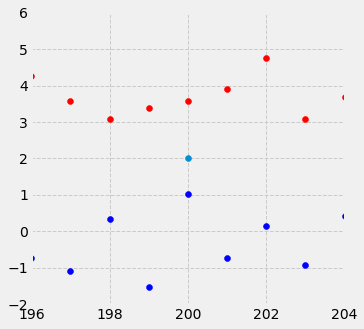

In [66]:
gotcha=guess_class(200,2,3)
print(gotcha)

In [18]:
arr = np.array((0,0))

In [21]:
arr[0]='1'

In [20]:
print(arr)

[1 0]


In [23]:
arr[:2]
arr2=np.array((8,9))

In [26]:
np.concatenate((arr,arr2))

array([1, 0, 8, 9])